## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [2]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


In [4]:
import matplotlib.pyplot as plt
from scipy import stats


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

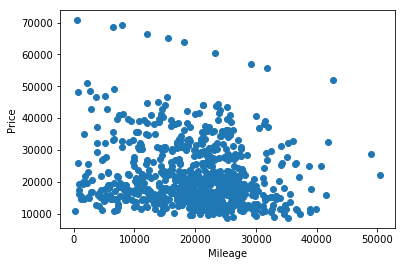

In [5]:
# Put the command (or commands) here that would give answer to the above question.
plt.scatter(cars["Mileage"],cars["Price"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

# it appears that there is a weak association of price vs mileage

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [6]:
# Linear regression model:
slope, intercept, r_value, p_value, std_err = stats.linregress(cars["Mileage"],cars["Price"])
# Show summary statistics for the model:
print("r squared = "+str(r_value**2))
print("p value = "+str(p_value))
print("standard error = "+str(std_err))

r squared = 0.0204634472856
p value = 4.68469803152e-05
standard error = 0.0421477558344


<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [7]:
# Command:
print(slope)

# One sentence summary:
"""
According to this fit, for every mile accumulated, the car's value
depreciates by about 17 cents.  After 1000 miles, the car would
be expected to depreciate by about $173
"""


-0.172520502602


"\nAccording to this fit, for every mile accumulated, the car's value\ndepreciates by about 17 cents.  After 1000 miles, the car would\nbe expected to depreciate by about $173\n"

<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [8]:
# Single command
print("A car with no miles is equivalent to the intercept, which is $"+str(intercept)) 

A car with no miles is equivalent to the intercept, which is $24764.5589912


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

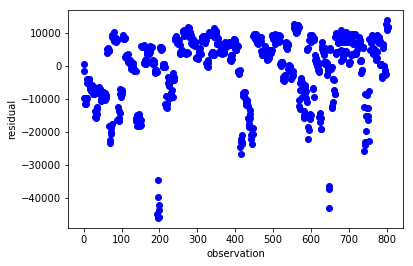

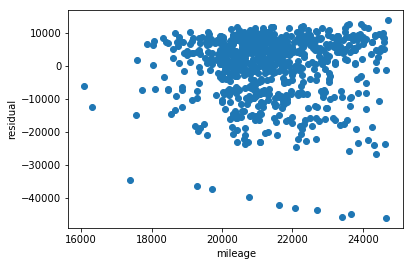

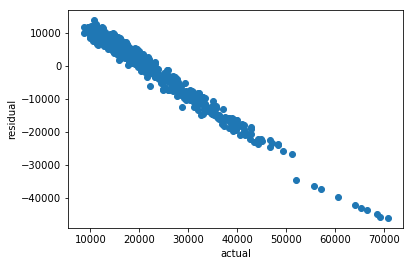

'\nError terms are supposed to be random and presumed to be \nnormally distributed around 0.  The error is here is assymetric\nand not distributed around 0.  The magnitude of errors are also \nsuch that the estimates are off by large factors.  \n'

In [12]:
# Plot residuals
def predict(x):
    return slope*x + intercept

residuals = predict(cars["Mileage"]) - cars["Price"]
plt.plot(residuals,"bo")
plt.xlabel("observation")
plt.ylabel("residual")
plt.show()

plt.clf()
plt.scatter(slope*cars["Mileage"] +intercept,residuals,marker = "o")
plt.xlabel("mileage")
plt.ylabel("residual")
plt.show()

plt.clf()
plt.scatter(cars["Price"],residuals,marker = "o")
plt.xlabel("actual")
plt.ylabel("residual")
plt.show()


# Explain whether there are any problems (1-2 sentence)
"""
Error terms are supposed to be random and presumed to be 
normally distributed around 0.  The error is here is assymetric
and not distributed around 0.  The magnitude of errors are also 
such that the estimates are off by large factors.  
"""


In [10]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

C:\Users\Joe\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [28]:
# Commands:
featureNames = ["Mileage","Cylinder","Doors","Cruise","Sound","Leather"]
features = cars[featureNames]
labels = cars["Price"]

#features[featureNames] = scale.fit_transform(features[featureNames].values)
#features = sm.add_constant(features)

features.head()

model = sm.OLS(labels,features).fit()
model.summary()

# Explanation:
# 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1198.
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:41:04   Log-Likelihood:                -8307.5
No. Observations:                 804   AIC:                         1.663e+04
Df Residuals:                     798   BIC:                         1.666e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage       -0.1196      0.030     -4.030      0.000      -0.178      -0.061
Cylinder    3615.2074    178.201     20.287      0.000    3265.409    3965.006
Doors       -635.4939    236.775     -2.684      0.007   -1100.270    -170.718
Cruise      6528.7484    653.250      9.994      0.000    5246.457    7811.040
Sound      -1350.7612    552.468     -2.445      0.015   -2435.224    -266.298
Leather     3806.1630    591.652      6.433      0.000    2644.786    4967.540
==============================================================================
Omnibus:                      148.684   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.645
Skew:                           1.114   Prob(JB):                     2.07e-58
Kurtosis:                       4.723   Cond. No.                     5.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [20]:
# Command(s):
cars[featureNames].corr()

# Comment on the result


,Mileage,Cylinder,Doors,Cruise,Sound,Leather
Mileage,1.000000,-0.029461,-0.016944,0.025037,-0.026146,0.001005
Cylinder,-0.029461,1.000000,0.002206,0.354285,-0.089704,0.075520
Doors,-0.016944,0.002206,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.025037,0.354285,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.026146,-0.089704,-0.062530,-0.091730,1.000000,0.165444
Leather,0.001005,0.075520,-0.061969,-0.070573,0.165444,1.000000


<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [29]:
chevy = {"Mileage":30000, "Cylinder":4, "Doors":2, "Cruise":1, "Sound":1, "Leather":1}
chevy = pd.DataFrame(chevy,index=[0])[featureNames]
model.predict(chevy)
# Commands that estimate the price of 'chevy' using the model with 6 predictors


0    18586.249852
dtype: float64

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [ ]:
# Commands

# Comments on problems
#